# Individual Project Machine Learning


## Task

This dataset is composed of 1200 samples with 35 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of the
k-NearestNeighbors algorithm (implemented by
sklearn.neighbors.KNeighborsClassifier) with that of Logistic Regression
(implemented by sklearn.linear_model.LogisticRegression). Try to optimize both
algorithms' parameters and determine which one is best for this dataset. At the
end of the analysis, you should have chosen an algorithm and its optimal set of
parameters: write this choice explicitly in the conclusions of your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Opening Files

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mathematical_Modelling_ML/Individual_Project/mldata_0003141748.csv")

In [ ]:
df

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,1,-0.944009,-1.272944,-1.969506,4.034648,3.868883,6.657397,-0.328898,0.092017,...,-0.808628,3.562652,1.478908,0.925786,-0.774817,-0.617520,-0.771227,-0.025093,-2.235120,-2.678979
1,1,0,0.573413,-0.053745,2.521455,-3.507493,-2.059020,0.298051,0.044776,-3.047724,...,-3.406139,-1.113889,1.624017,0.142771,0.980293,-2.938575,2.043746,0.687261,2.651281,0.458840
2,2,0,-2.592215,-3.922701,-3.559185,3.014905,2.103093,4.865483,1.336029,2.836699,...,0.235012,4.530671,1.719436,-2.379523,0.048087,4.262534,-0.295864,2.410535,-1.569430,-4.669056
3,3,1,-3.155210,0.968290,0.485320,-1.464093,-2.003625,-2.220577,2.387918,-0.513608,...,-0.702881,-1.780161,0.791057,-1.433502,0.583776,-2.432876,2.190104,-0.223386,0.986660,-2.468875
4,4,1,-1.816979,-2.389119,-2.747206,3.133913,-0.771440,2.965242,0.599826,0.188715,...,0.624283,2.157346,2.697068,-0.969357,1.156977,-0.381780,-0.960439,1.901477,-1.685177,-5.533656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,0,1.794327,0.098755,-0.379600,4.080827,1.862926,1.309263,-5.316201,2.355608,...,4.348214,-0.226752,-3.404319,1.016208,-2.460931,1.449614,-3.450524,-3.056240,1.064583,3.804249
1196,1196,1,0.405813,-4.949318,-3.017990,4.822752,1.598513,3.700430,-0.698108,-2.373992,...,-1.284224,1.538980,1.275424,-1.100556,-1.394384,-1.550911,-0.184599,1.117355,-0.871779,-2.474496
1197,1197,1,-1.276670,-0.869065,-2.727813,3.135433,-0.213520,4.488858,0.428465,0.095180,...,-0.144379,2.871012,0.149504,-1.196392,0.031834,0.653594,-1.442288,1.284589,-0.149418,-5.086633
1198,1198,1,-1.552196,-1.745095,-2.945634,3.811138,1.029492,5.213701,1.219771,-0.632891,...,-2.573062,3.671462,2.280089,-1.807409,-0.730201,1.059905,-2.449360,0.980769,-0.488176,-3.815761


## Exploratory Data Analysis

An important thing to do before we begin our work is having a brief look at our file.

We may have with some questions like:
1. First of all, checking if we indeed have only two classes.
2. Does our dataset have any missing values?
3. Is the label column balanced between the classes?
4. How are the feature columns distributed?
5. What about the statistical properties of our dataset? (without the label column)

### Number of Classes

In [ ]:
(df['label'] == 1).sum() + (df['label'] == 0).sum() == len(df['label']) 

True

Indeed we have only two classes.

### Missing Values

In [ ]:
df.isna().sum()

Unnamed: 0    0
label         0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
dtype: int64

Luckly we can see that for all columns we don't have any Missing Values, i.e. NAs

### Balanced Dataset

Now we count the number of zeros and the number of ones. 
Moreover we look at their ratio, if it is sufficiently close to one it means our dataset is balanced in the 'label' column.

In [ ]:
(df['label'] == 0).sum(), (df['label'] == 1).sum(), (df['label'] == 0).sum()/(df['label'] == 1).sum()

(601, 599, 1.003338898163606)

We can easily see that they are quite balanced. 
The dataset is well balanced as it is almost split in exact half as far as predicions go.

### Correlation Matrix

Let's now look at the correlation between our features

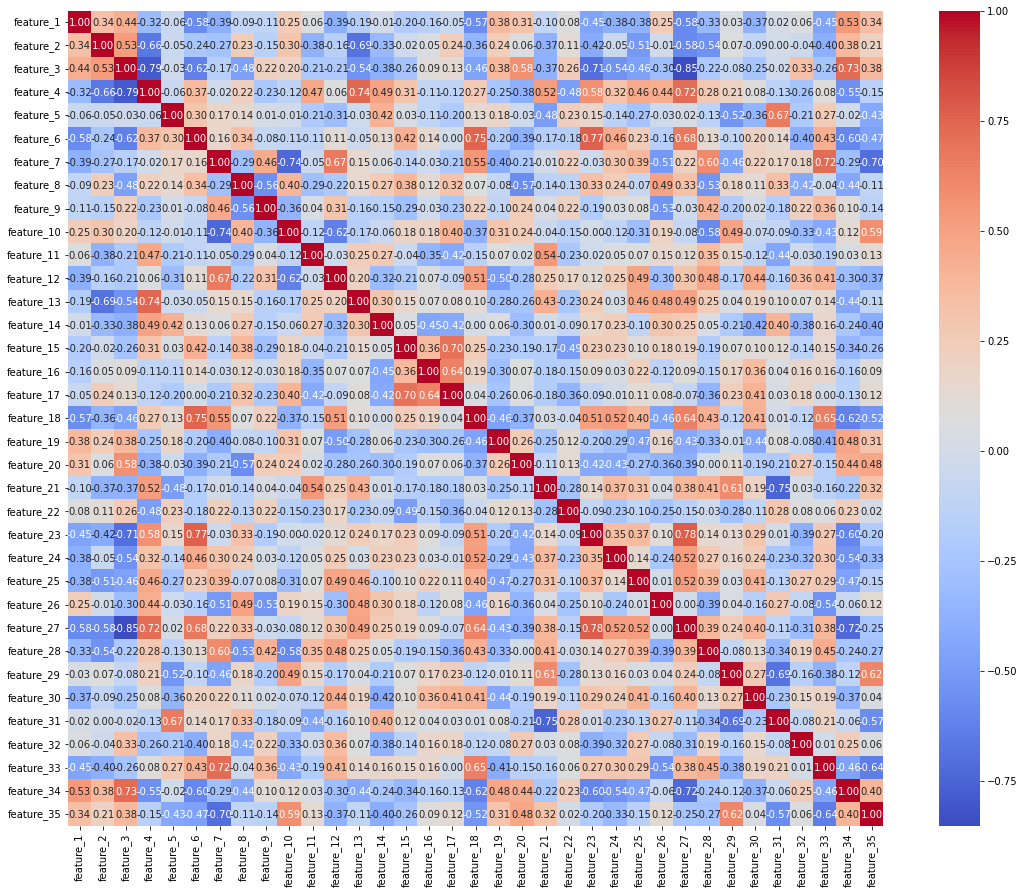

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 15))

corr = df.iloc[:, 2:].corr()
sns.heatmap(corr, vmax=1, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, cmap = 'coolwarm')

From this we can deduce that there is a large number of features which are almost perfectly uncorrelated.

### Distribution of Features (maybe do something more)

Let's now have a look at the columns of our dataset. Are they normally distributed?

Lets first sample 5 column indices at random.

In [ ]:
import random
l = [random.randint(2, 35) for i in range(5)]
l

[23, 21, 13, 35, 27]

Using values [23, 21, 13, 35, 27] we plot those columns

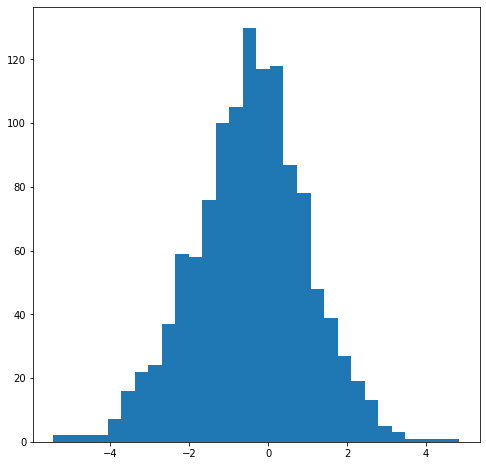

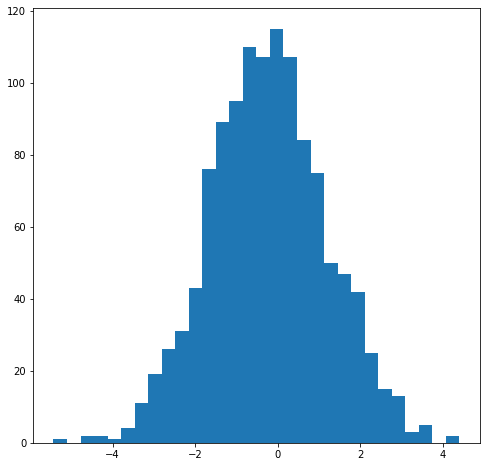

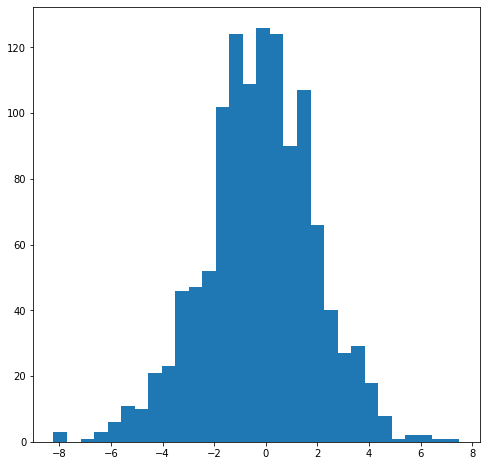

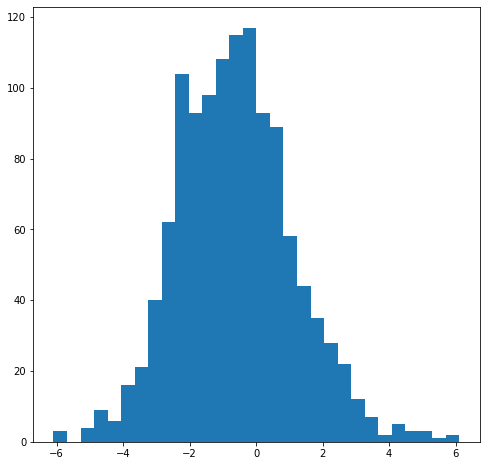

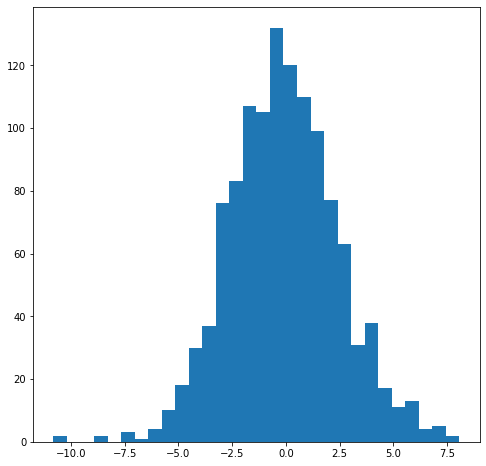

In [ ]:
import random

for i in l:
  fig = plt.figure(figsize = (8,8))
  plt.hist(df.iloc[:, i], bins=30)  
  plt.show()

By plotting randomly columnns of the dataframe we see that more or less all of them follow a normal distribution. 

### Statistical Summary

Down below we can find a statistical summary of our table of features. 

In [ ]:
df.iloc[:, 2:].describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-0.301791,-0.855254,-0.837610,1.309735,0.281593,1.837095,-0.196031,0.344944,-0.224855,0.183833,...,-0.093931,1.083122,0.098643,-0.076228,0.037560,0.423139,-0.483938,0.185444,-0.623034,-1.072439
std,1.341337,2.307901,2.269325,3.026992,1.503908,2.736753,1.897124,2.105147,1.367746,2.035392,...,2.521610,2.560113,1.844119,1.895939,1.365407,3.289854,1.474651,1.668106,1.747091,3.738512
min,-4.459254,-8.460067,-7.294715,-8.940502,-4.807663,-7.177158,-7.729117,-7.896452,-4.751765,-7.179423,...,-10.821513,-9.693509,-6.985100,-5.245186,-4.093378,-12.283822,-5.444932,-5.989514,-6.093172,-11.405880
25%,-1.216178,-2.463297,-2.327419,-0.696653,-0.624609,0.163457,-1.283376,-1.036345,-1.115211,-1.099797,...,-1.795959,-0.307733,-1.134161,-1.291936,-0.848743,-1.505332,-1.475425,-0.694656,-1.878323,-3.616726
50%,-0.373717,-0.969533,-0.852359,1.403347,0.412543,1.823609,-0.048149,0.367962,-0.209627,0.225878,...,-0.136132,1.211310,0.202310,-0.192906,0.052572,0.392935,-0.516508,0.380052,-0.671511,-1.433986
75%,0.542212,0.669790,0.546274,3.465134,1.346367,3.635199,1.038251,1.689484,0.673890,1.540904,...,1.525290,2.756828,1.381923,1.057080,0.928108,2.512236,0.497716,1.320867,0.432026,1.455151
max,4.685437,7.036948,9.004122,10.548392,4.347960,10.786496,5.319303,6.767523,4.208214,6.742641,...,8.077393,9.038871,5.903514,7.842910,3.871784,14.568114,6.126461,5.578181,6.109971,10.219058


Here we have a more compelling evidence that our dataset is more or less following a normal distribution

## Plotting Data

We will now perform a 2D plotting of our data. We will do it between feature 1 and feature 2, 3, 4. 

How do the features interact with each other? 
Can we see any relevant differences between the two lables? 

In [ ]:
list01 = list(df['label'])


No handles with labels found to put in legend.


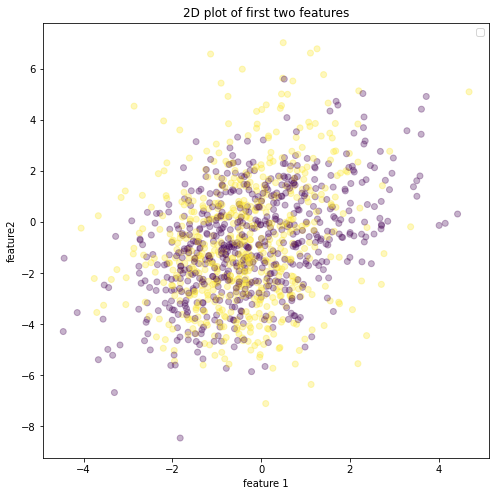

No handles with labels found to put in legend.


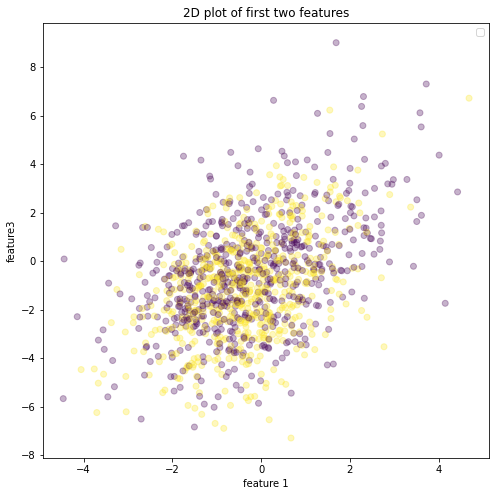

No handles with labels found to put in legend.


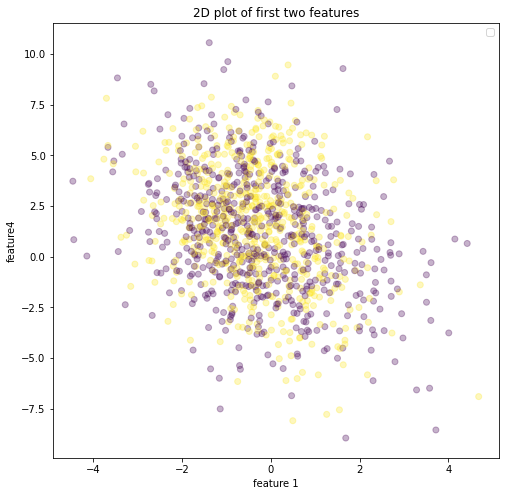

In [ ]:
for i in range(3, 6):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('feature 1')
  ax.set_ylabel(f'feature{i-1}')
  ax.set_title('2D plot of first two features')

  ax.scatter(df.iloc[:, 2], df.iloc[:, i], alpha = 0.3, c = list01)
  ax.legend()
  plt.show()

We can not really distinguish label 0 (purple) vs label 1 (yellow).


## Dimensionality Reduction through PCA

Let's now see if using dimensionality reduction through PCA we can disntinguish the two labels a little bit better.

In [ ]:
data = df.iloc[:, 2:]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
data_red = pca.fit_transform(data)
pca.explained_variance_ratio_

array([0.27625144, 0.17468328, 0.14521191, 0.11938151, 0.0685862 ,
       0.04146599, 0.03721923, 0.02559253, 0.00789857, 0.00770102,
       0.00750127, 0.00734898, 0.00722886, 0.00692712, 0.00681814,
       0.00667211, 0.00646054])

 #### 2D plot of PCA

No handles with labels found to put in legend.


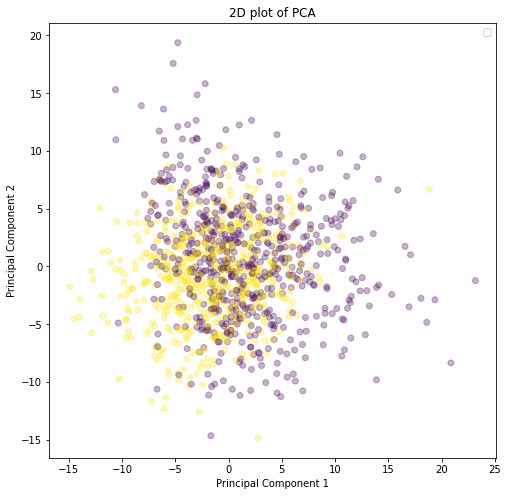

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D plot of PCA')

ax.scatter(data_red[:, 1], data_red[:, 2],alpha = 0.3, c = list01)

ax.legend()
plt.show()

The point of trying to plot the data normally and in PCA is that we can not identify clearly clusters of data. 

#### 3D plot of PCA

No handles with labels found to put in legend.


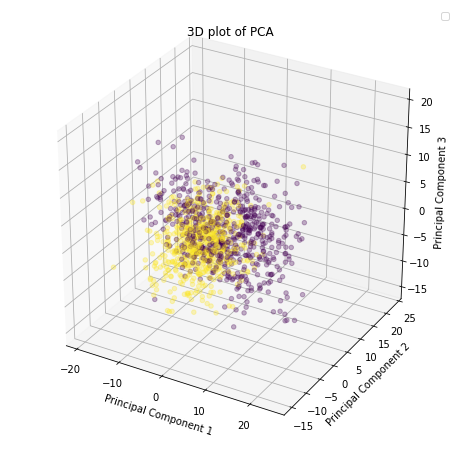

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D plot of PCA')

ax.scatter(data_red[:, 0],data_red[:, 1], data_red[:,2], c = list01, alpha = 0.3)

ax.legend()

plt.show()

#### Interactive plot

In [ ]:
#pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 17.5 MB/s 
     |████████████████████████████████| 357 kB 38.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=36db77f10394c77ac71b0b9fb21e5ff3f063bac768bbc0a9c4e1dfccbfee0703
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
plot_df = pd.DataFrame(data_red[:, 0:3])
plot_df.columns = ["PC1","PC2","PC3"]
plot_df["Color"] = list01

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

fig = px.scatter_3d(
    data_frame = plot_df,
    x = "PC1",
    y = "PC2",
    z = "PC3",
    color = "Color",
    title = "Interactive PCA plot with supervised labels",
)

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## Supervised Learning

Our task throughout this section will be to compare and contrast the results we get using two different classifier methods:

K-Nearest Neighbours and Logistic Regression

### K-Nearest Neighbors

In this section we will go through the process of  developing the best possible KNeighbors Classifier.

We will procede in steps:
1. Perform some cross validation over the train and test set, without specifiying any parameters.

2. Focus on the n_neighbors parameter, which we know from theory to be the most relevant one. 

3. Performing some Hyper Parameter Tuning. We will mainly use GridSearchCV and focus on some of the more relevant parameters. And then perform both a GridSearchCV and a RandomizedSearchCV on all parameters together. 


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:]
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

Does splitting the dataset in train and test mantains the percentage of 0s and 1s in the label column?

In [ ]:
(y_train == 0).sum(),  (y_train == 1).sum(), (y_train == 0).sum()/(y_train == 1).sum()

(423, 381, 1.110236220472441)

In [ ]:
(y_test == 0).sum(), (y_test == 1).sum(), (y_test == 0).sum()/(y_test == 1).sum()

(178, 218, 0.8165137614678899)

More or less it is a resonably well kept ratio between the two categories.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier() 
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9671717171717171

#### Cross Validation

Firstly let's try to see how and if the accuracy changes as we do some cross validation over the way our train and test sets are split.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:]
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh, X, y, cv = 10, scoring = 'accuracy')
scores

array([0.96666667, 0.94166667, 0.95      , 0.95      , 0.94166667,
       0.975     , 0.975     , 0.90833333, 0.96666667, 0.95      ])

In [ ]:
scores.mean()

0.9524999999999999

We note that the KNearest Neighbor classifier has on average an accuracy of 95.2%


#### N_neighbors Hyper parameter

From theory we know that n_neighbors parameter is the most important when it comes to classification of new points.

That is why throughout this section we will try to analyize this hyperparameter. 

One possible experiment that we could do is look at how, as the number of neighbors change, the accuracy score changes and then plot it in a graph to show which are the ideal numbers of neighbors to consider.


A clarification must be made:

Since we are tackling a binary classification problem, ideally we would like to use an odd number of neighbors, so that every time we have a definitive answer to which cluster the new data point belongs.



##### Without cross validation

<BarContainer object of 30 artists>

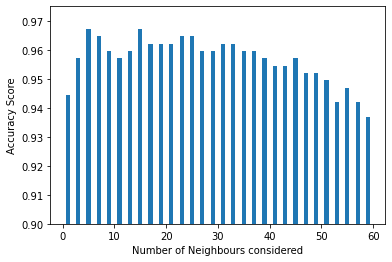

In [ ]:
acc_level = []

for k in range(1, 60, 2):
  neigh = KNeighborsClassifier(n_neighbors = k)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  acc_level.append(accuracy_score(y_pred, y_test))

plt.xlabel("Number of Neighbours considered")
plt.ylabel("Accuracy Score")
plt.ylim([0.90, 0.975])

plt.bar([i for i in range(1, 60, 2)], acc_level)

##### With cross validation

<BarContainer object of 30 artists>

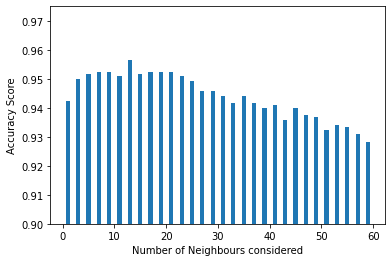

In [ ]:
acc_level = []

for k in range(1, 60, 2):
  neigh = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(neigh, X, y, cv = 5, scoring = 'accuracy')
  acc_level.append(scores.mean())


plt.xlabel("Number of Neighbours considered")
plt.ylabel("Accuracy Score")
plt.ylim([0.90, 0.975])

plt.bar([i for i in range(1, 60, 2)], acc_level)

From these two plots, expecially the one done through cross validation, we can easly see that when the number of neighbors is very low then we are over fitting. That is because we are in a situation where we have reduced the bias, but the variance has increased a lot.

Whereas when we are considering a higher number of neighbors we can conclude that we are underfitting. That is because, opposite to what we said before we have a case of high bias but low variance. 


From this we can conclude that the best window of *n_neighbors* parameter is around 10

#### Hyper Parameters Tuning


Let see what happens if we try to explore different values for the hyper parameters of the Classifier.

##### Grid Search

First of all which are the most relevant?

From theory we know that n_neighbors is definitely the most important. Since we already tried that one out, in this section we will focus on optimizing over the possible values of other parameters such as
- *weights*
- *metric* 
  - *p* correspoding to metric = 'minkowski'
- *algorithm* 


###### Weights

Changing the hyper parameter weights accounts to change the way the weight between the neighbors is distributed.

For example a weights parameter "uniform" will make the weights be distributed equally between all neighbor datapoints, whereas "distance" will assign a higher weight to the closer neighbor points. 

These differences will change the way the algorithm performes so have to be investigated.

In [ ]:
from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings('ignore')

cv_neigh = KNeighborsClassifier()

p_grid = {'n_neighbors': [i for i in range(3, 10, 2)],
          'weights' : ["uniform", "distance"]}
          
gs = GridSearchCV(cv_neigh, param_grid = p_grid).fit(X_train, y_train)
gs.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = gs.predict(X_test)
accuracy_score(y_pred, y_test)

0.9671717171717171

###### Metric

We will now perform a GridSearchCV over the n_neighbors (which are again taken to be odd), and 'metric'

In [ ]:
from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings('ignore')

cv_neigh = KNeighborsClassifier()

p_grid = {'n_neighbors': [i for i in range(3, 10, 2)],
          'metric' : ["minkowski", "chebyshev", "mahalanobis", "seuclidean"]}
          
gs = GridSearchCV(cv_neigh, param_grid = p_grid).fit(X_train, y_train)
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 5}

In [ ]:
y_pred = gs.predict(X_test)
accuracy_score(y_pred, y_test)

0.9671717171717171

From the previous blokcs we notices that Minkowsky one is the best Metric to use. 


An insteresting thing we could try is seeing whether changing p changes the accuracy of our model.  
Indeed we know that for different values of p we have different types of metrics: 

-  p = 1   Manhattan metric

-  p = 2   Euclidean metric

-  p  →  ∞   Chebyshev metric


That is why when trying multiple values for p we also insert some high values like 100000 or 1000000 to try and 'simulate' a value of p going to ∞

In [ ]:
from sklearn.model_selection import GridSearchCV

cv_neigh = KNeighborsClassifier(metric = 'minkowski')

pl = [i for i in range(1, 10)]
pl.append(100000)
pl.append(1000000)

p_grid = {'n_neighbors': [i for i in range(3, 10, 2)],
          'p' : pl}
          
gs = GridSearchCV(cv_neigh, param_grid = p_grid).fit(X_train, y_train)
gs.best_params_

{'n_neighbors': 5, 'p': 3}

In [ ]:
y_pred = gs.predict(X_test)
accuracy_score(y_pred, y_test)

0.9671717171717171

###### Algorithm 

Here instead we are still cross validating over *n_neighbors* and *metric* we are adding a parameter *algorithm*, which essentially is telling us which is the best algorithm to use when computing the nearest neighbor. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

cv_neigh = KNeighborsClassifier()

p_grid = {'n_neighbors': [i for i in range(3, 10, 2)],
          'metric' : ["minkowski", "mahalanobis", "seuclidean"],
          'algorithm' : ["auto", "ball_tree", "kd_tree"]}
          
  
gs = GridSearchCV(cv_neigh, param_grid = p_grid).fit(X_train, y_train)
gs.best_params_

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5}

In [ ]:
y_pred_gs = gs.predict(X_test)
accuracy_score(y_pred_gs, y_test)

0.9671717171717171

###### Over all Parameters

From what we have seen and from theory we know that the 'minkowski' metric is the best one. 

So in the next blocks we will be doing a gridsearchCV over all possible parameters, including also the 'weights' parameter.


In [ ]:
from sklearn.model_selection import GridSearchCV

cv_neigh = KNeighborsClassifier(metric = 'minkowski')

pl = [i for i in range(1, 10)]
pl.append(100000)
pl.append(1000000)

p_grid = {'n_neighbors': [i for i in range(3, 10, 2)],
          'weights' : ['uniform', 'distance'],
          'algorithm' : ["auto", "ball_tree", "kd_tree"],
          'p' : pl}
          
gs = GridSearchCV(cv_neigh, param_grid = p_grid).fit(X_train, y_train)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}

In [ ]:
y_pred_general_gs = gs.predict(X_test)
accuracy_score(y_pred_general_gs, y_test)

0.9671717171717171

This block takes a while to run, and we don't really see any improvement in the accuracy level so we will procede by using as different technique for Hyper Parameter Tuning. 

##### Randomized Search

We can try to do a hyper parameter tuning over all possible parameters of the model using Randomized search, which differently from GridSearch does not try every combination between the parameters but just randomly picks a subset of comninations (specified by n_iter).


Using RandomizedSearchCV is especially useful in situations where we have a large number of combinations. 
One of the drawbacks however is that, by not considering all possible combinations, it may leave out the best ones, resulting in a lower overall accuracy.

So in a sense we are gaining on running time but losing on the accuracy.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

cv_neigh = KNeighborsClassifier(metric = 'minkowski')

pl = [i for i in range(1, 10)]
pl.append(100000)
pl.append(1000000)

p_grid = {'n_neighbors': [i for i in range(1, 10, 2)],
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'p' : pl}
          
rs = RandomizedSearchCV(cv_neigh, param_distributions = p_grid, n_iter = 30).fit(X_train, y_train)
rs.best_params_

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [ ]:
y_pred_rv = rs.predict(X_test)
accuracy_score(y_pred_rv, y_test)

0.9671717171717171

#### Model Evaluation

Let's now try to evaluate our final model based on more then accuracy score.

We will use two different results and compare them. 
The results we got from the GridSearchCV over 'n_neighbors', 'metric' and 'algorithm', and the results of the RandomizedSearchCV over all possible parameters.

We will look at many things:

1. The confusion matrix:
        So that we can see and count how many True Positive False Positives, True Negative and False Negatives we have
2. Precision Score:            
        that is the ratio between True Positives and the sum of True Positives and False Positives, TP/(TP + FP) 
3. Recall, aka Sensitivity:
        that is the ration between True Positives and the sum of True Positives and False Negatives, TP/(TP + FN)
4. F1 Score: 
        that is nothing but the weighted average of the Precision and Recall

5. Classification Report:
        lastly we will look at a kind of summary of everything we have seen above, plus some interesting data like
        a. Support: which is the number of examples over which metrics where evaluated on
        b. Accuracy: we already know what it is
        c. Macro avg: its just the average over precision, recall and F1 scores over all (in our case 2) classes (WATCH OUT FOR CLASS IMBALANCE)
        d. Weighted avg: its just like the above Macro avg but instead takes into account thw number of samples per each class. This allows us to avoid mistakes if we had a class imbalance. 
        Luckly we don't have class imbalances and we can also see it from the fact that values for Macro avg and Weighted avg are the same

     
Obviously in depending on the domani these question may be very interesting, and indeed False Positives can happen to have different relative importance with respect to False Negatives and vice versa. 

*In madical testing for example False Positives have a lower relative importance then False Negatives*

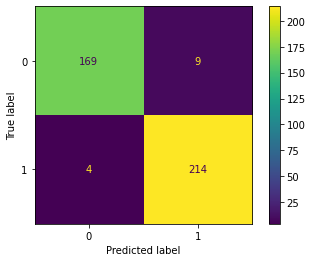

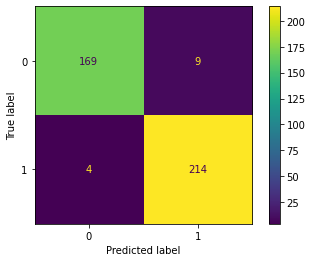

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cmgs = confusion_matrix(y_test, y_pred_gs)
cmrv = confusion_matrix(y_test, y_pred_rv)


for i in [cmgs, cmrv]:
  display = ConfusionMatrixDisplay(confusion_matrix = i, display_labels = ['0', '1'] )
  display.plot()

plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for scr in (precision_score, recall_score, f1_score):
  sgs = scr(y_test, y_pred_gs)
  srv = scr(y_test, y_pred_rv)
  print(scr.__name__, (sgs, srv))


precision_score (0.9596412556053812, 0.9596412556053812)
recall_score (0.981651376146789, 0.981651376146789)
f1_score (0.9705215419501134, 0.9705215419501134)


In [ ]:
from sklearn.metrics import classification_report

csgs = classification_report(y_test, y_pred_gs, target_names = ['label 0', 'label 1'])
csrv = classification_report(y_test, y_pred_rv, target_names = ['label 0', 'label 1'])
print(csgs, csrv)

              precision    recall  f1-score   support

     label 0       0.98      0.95      0.96       178
     label 1       0.96      0.98      0.97       218

    accuracy                           0.97       396
   macro avg       0.97      0.97      0.97       396
weighted avg       0.97      0.97      0.97       396
               precision    recall  f1-score   support

     label 0       0.98      0.95      0.96       178
     label 1       0.96      0.98      0.97       218

    accuracy                           0.97       396
   macro avg       0.97      0.97      0.97       396
weighted avg       0.97      0.97      0.97       396



We can see some differences between the models which the accuracy does not actually depict. 

In this case we do not have any domain specific knowledge so we would not know wheter we would like to keep the method which had more false positives or the one which had more false negatives.
In this case we will just choose the method that used GridSearchCV just because we want to be conservative and be sure about its performance. 

### Logistic Regression

Throughout this section we will construct the best possible model using Logistic Regression Classifier. 

As we did in the K-Nearest Neighbor case we will procede in steps:

1. Perform some cross validation over the way we split train and test set 

2. We will brefly focus on some of the most relevant parameters which we saw from theory.

        a. Penalty
        b. Solver

3. Them we will try to improve the accuracy of our model performing some GridSearchCV and later on also a RandomizedSearchCV.

4. Lastly, as we did for K-Nearest Neighbor, we are goingo to take a look at some other evualuation methods for our model.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:]
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

As we did for K-Nearest Neighbors we try to fit the model without specifying any parameters at first to see how it behaves.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.9065656565656566

#### Cross Validation

Let's now try to do some cross validation over the train and test set  

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv = 10, scoring = 'accuracy')
scores

array([0.89166667, 0.88333333, 0.90833333, 0.85      , 0.91666667,
       0.88333333, 0.88333333, 0.925     , 0.9       , 0.9       ])

In [ ]:
scores.mean()

0.8941666666666667

#### Penalty Hyper Parameter

We will now focus on the most relevant parameter that is the penalty one.

We will try to see how does the accuracy changes as we consider different types of penalization. 

Clarification: 

a. we need to specify the solver to be 'saga' just because otherwise we incurr into errors

b. when we have 'elasticnet' as penalty we need to specify the 'l1_ratio' to be between 0 and 1, we choose 0.5 randomly.

##### Without Cross Validation

<BarContainer object of 4 artists>

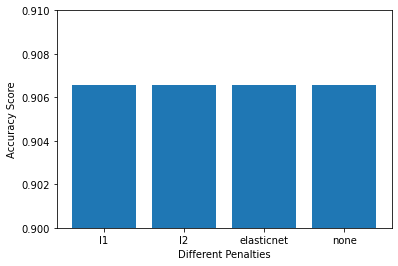

In [ ]:
pen_list = ['l1', 'l2', 'elasticnet', 'none']
acc_level = []

for p in pen_list:
  if p == 'elasticnet':
    lr = LogisticRegression(penalty = p, solver = 'saga', l1_ratio = 0.5, random_state = 42)
  else: 
    lr = LogisticRegression(penalty = p, solver = 'saga', random_state = 42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  acc_level.append(accuracy_score(y_pred, y_test))

plt.xlabel("Different Penalties")
plt.ylabel("Accuracy Score")
plt.ylim([0.90, 0.91])

plt.bar(pen_list, acc_level)

##### With Cross Validation

<BarContainer object of 4 artists>

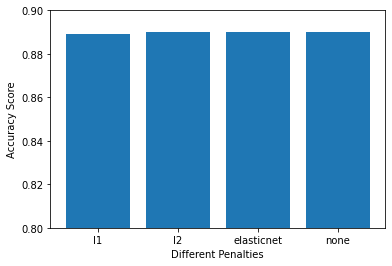

In [ ]:
pen_list = ['l1', 'l2', 'elasticnet', 'none']
acc_level = []

for p in pen_list:
  if p == 'elasticnet':
    lr = LogisticRegression(penalty = p, solver = 'saga', l1_ratio = 0.5, random_state = 42)
  else: 
    lr = LogisticRegression(penalty = p, solver = 'saga', random_state = 42)
  scores = cross_val_score(lr, X, y, cv = 5, scoring = 'accuracy')
  acc_level.append(scores.mean())

plt.xlabel("Different Penalties")
plt.ylabel("Accuracy Score")
plt.ylim([0.80, 0.90])

plt.bar(pen_list, acc_level)

#### Solver Hyper Parameter

<BarContainer object of 5 artists>

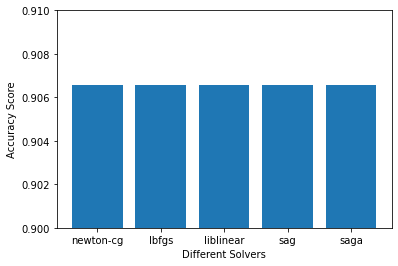

In [ ]:
solv_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
acc_level = []

for s in solv_list:
  if s == 'saga':
    lr = LogisticRegression(solver = s, l1_ratio = 0.5, random_state = 42)
  else:
    lr = LogisticRegression(penalty = 'l2', solver = s, l1_ratio = 0.5, random_state = 42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  acc_level.append(accuracy_score(y_pred, y_test))

plt.xlabel("Different Solvers")
plt.ylabel("Accuracy Score")
plt.ylim([0.90, 0.91])

plt.bar(solv_list, acc_level)

##### With Cross Validation

<BarContainer object of 5 artists>

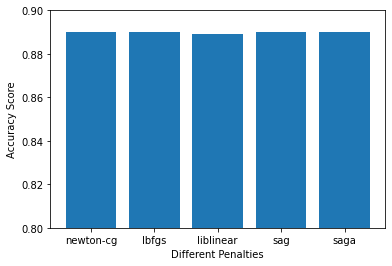

In [ ]:
solv_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
acc_level = []

for s in solv_list:
  if s == 'saga':
    lr = LogisticRegression(solver = s, l1_ratio = 0.5, random_state = 42)
  else:
    lr = LogisticRegression(penalty = 'l2', solver = s, l1_ratio = 0.5, random_state = 42)
  scores = cross_val_score(lr, X, y, cv = 5, scoring = 'accuracy')
  acc_level.append(scores.mean())

plt.xlabel("Different Penalties")
plt.ylabel("Accuracy Score")
plt.ylim([0.80, 0.90])

plt.bar(solv_list, acc_level)

Using Cross Validation we can see that the scores of some values of both penalty and solver parameters have lower accuracy.

Namely with 'l1 penalty' and 'liblinear solver'.

#### Hyper Parameters Tuning

In the following section we will try to tune some hyper parameters in order to try and improve the accuracy of our model.

In particular we will focus on 

1. Penalty, which as we know imposes different type of penalties such as lasso (l1), ridge (l2), ann elastic nets which is a combination of the two.

2. C
3. Solver, which gives different algorithms in which to approach the optimization problem
4. max_iter
5. multi_class, which depending on what type of data we have chooses the best value of 'multi_class'



##### Grid Search

In this section we will tackle the problem of tuning the hyper parameters of our model using GridSearchCV. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression(random_state = 42)

p_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : [10.0, 100.0, 1000.0, 10000.0, 100000.0],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100, 200, 300],
          'multi_class' : ['auto', 'ovr', 'multinomial']}

gs = GridSearchCV(lr, param_grid = p_grid).fit(X_train, y_train)
gs.best_params_

{'C': 10.0,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_gs1 = gs.predict(X_test)

accuracy_score(y_pred_gs1, y_test)

0.9065656565656566

Here we will also perform another grid search eliminating the parameters we found having less accuracy in our previous analyisis through cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression(random_state = 42)

p_grid = {'penalty': ['l2', 'elasticnet', 'none'],
          'C' : [10.0, 100.0, 1000.0, 10000.0, 100000.0],
          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
          'max_iter': [100, 200, 300],
          'multi_class' : ['auto', 'ovr', 'multinomial']}

gs = GridSearchCV(lr, param_grid = p_grid).fit(X_train, y_train)
gs.best_params_

{'C': 10.0,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_gs2 = gs.predict(X_test)

accuracy_score(y_pred_gs2, y_test)

0.9065656565656566

As we have learned from the previous cases and as we can se from the block above, it takes a lot to run these blocks because of the many combinations between the parameter values.

##### Randomized Search

As a consequences we will now implement a RandomizedSearchCV method which, as we said before, will improve the running time of our Parameter Tuning. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


lr = LogisticRegression(random_state = 42)

p_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : [10.0, 100.0, 1000.0, 10000.0, 100000.0],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100, 200, 300],
          'l1_ratio': np.arange(0, 1, 0.1),
          'multi_class' : ['auto', 'ovr', 'multinomial']}

rv = RandomizedSearchCV(lr, param_distributions = p_grid, n_iter = 50).fit(X_train, y_train)
rv.best_params_

{'C': 10000.0,
 'l1_ratio': 0.4,
 'max_iter': 200,
 'multi_class': 'ovr',
 'penalty': 'none',
 'solver': 'sag'}

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_rv = rv.predict(X_test)

accuracy_score(y_pred_rv, y_test)

0.9065656565656566

#### Model Evaluation

As we did for K-Nearest Neighbors will use different metrics to evaluate the performance of our model.

Here however e will compare the predictions obtained by all the three different models we trained and in the end decide which one to pick.


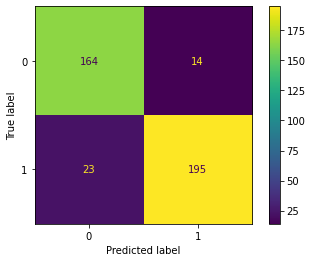

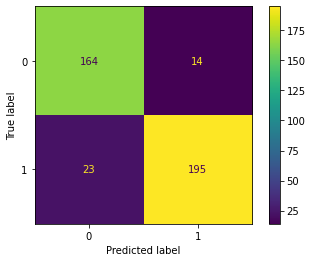

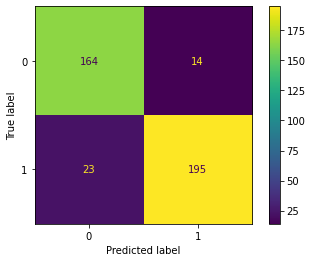

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cmgs1 = confusion_matrix(y_test, y_pred_gs1)
cmgs2 = confusion_matrix(y_test, y_pred_gs2)
cmrv = confusion_matrix(y_test, y_pred_rv)

for i in [cmgs1, cmgs2, cmrv]:
  display = ConfusionMatrixDisplay(confusion_matrix = i, display_labels = ['0', '1'] )
  display.plot()

plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for scr in (precision_score, recall_score, f1_score):
  sgs1 = scr(y_test, y_pred_gs1)
  sgs2 = scr(y_test, y_pred_gs2)
  srv = scr(y_test, y_pred_rv)
  print(scr.__name__, (sgs1, sgs2, srv))


precision_score (0.9330143540669856, 0.9330143540669856, 0.9330143540669856)
recall_score (0.8944954128440367, 0.8944954128440367, 0.8944954128440367)
f1_score (0.9133489461358314, 0.9133489461358314, 0.9133489461358314)


In [ ]:
from sklearn.metrics import classification_report

csgs1 = classification_report(y_test, y_pred_gs1, target_names = ['label 0', 'label 1'])
csgs2 = classification_report(y_test, y_pred_gs2, target_names = ['label 0', 'label 1'])
csrv = classification_report(y_test, y_pred_rv, target_names = ['label 0', 'label 1'])
print(csgs1, csgs2, csrv)

              precision    recall  f1-score   support

     label 0       0.88      0.92      0.90       178
     label 1       0.93      0.89      0.91       218

    accuracy                           0.91       396
   macro avg       0.91      0.91      0.91       396
weighted avg       0.91      0.91      0.91       396
               precision    recall  f1-score   support

     label 0       0.88      0.92      0.90       178
     label 1       0.93      0.89      0.91       218

    accuracy                           0.91       396
   macro avg       0.91      0.91      0.91       396
weighted avg       0.91      0.91      0.91       396
               precision    recall  f1-score   support

     label 0       0.88      0.92      0.90       178
     label 1       0.93      0.89      0.91       218

    accuracy                           0.91       396
   macro avg       0.91      0.91      0.91       396
weighted avg       0.91      0.91      0.91       396



In this case we will choose the model given by RandomizedSearchCV, mainly because it is the faster to run and over all gives the same levels of precision recall and accuracy, as welll as f1 score.

## Comparing Best Models


In this last but one section we will be comparing the two best model we managed to build from each classifier. That is one for the KNN and the other for the Logistic.

In this way we are able to compare their prediction and scores closely.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:]
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

KNN Best Model

In [ ]:
knn = KNeighborsClassifier(algorithm ='auto', metric = 'minkowski', n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_pred_knn, y_test)

0.9671717171717171

Logistic Best Model

In [ ]:
lg = LogisticRegression(C = 100000.0, l1_ratio = 0.5, max_iter = 100, multi_class = 'ovr', penalty = 'l2', solver = 'saga', random_state = 42)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)
accuracy_score(y_pred_lg, y_test)

0.9065656565656566

### Model Evaluation

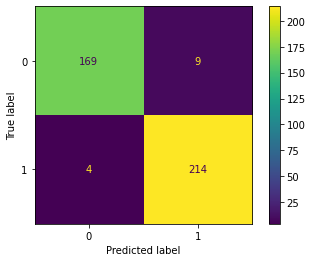

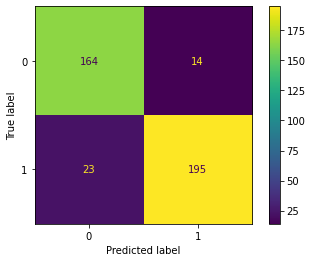

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cmgs = confusion_matrix(y_test, y_pred_knn)
cmrv = confusion_matrix(y_test, y_pred_lg)

for i in [cmgs, cmrv]:
  display = ConfusionMatrixDisplay(confusion_matrix = i, display_labels = ['0', '1'] )
  display.plot()

plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for scr in (precision_score, recall_score, f1_score):
  sgs = scr(y_test, y_pred_knn)
  srv = scr(y_test, y_pred_lg)
  print(scr.__name__, (sgs, srv))


precision_score (0.9596412556053812, 0.9330143540669856)
recall_score (0.981651376146789, 0.8944954128440367)
f1_score (0.9705215419501134, 0.9133489461358314)


In [ ]:
from sklearn.metrics import classification_report

csgs = classification_report(y_test, y_pred_knn, target_names = ['label 0', 'label 1'])
csrv = classification_report(y_test, y_pred_lg, target_names = ['label 0', 'label 1'])
print(csgs, csrv)

              precision    recall  f1-score   support

     label 0       0.98      0.95      0.96       178
     label 1       0.96      0.98      0.97       218

    accuracy                           0.97       396
   macro avg       0.97      0.97      0.97       396
weighted avg       0.97      0.97      0.97       396
               precision    recall  f1-score   support

     label 0       0.88      0.92      0.90       178
     label 1       0.93      0.89      0.91       218

    accuracy                           0.91       396
   macro avg       0.91      0.91      0.91       396
weighted avg       0.91      0.91      0.91       396



Following these results we can clearly see that the best algorithm is the K-Nearest Neighbor Classifier with the following parameters:

      KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors =  5)

## Ensemble Learning

In this section we will additionally try to do an ensamble method between K-Nearest Neighbor, Logistic Regression and Support Vector Machine.

We choose support vector machines because for a binary classification problem should work appropriately. 

##### Hard Voting

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

svm = SVC(gamma="scale")

vot_clf = voting_clf = VotingClassifier(estimators=[('knn', cv_neigh), ('lr', lr), ('svm', svm)], voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svm', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (cv_neigh, lr, svm, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.9671717171717171
LogisticRegression 0.9065656565656566
SVC 0.9747474747474747
VotingClassifier 0.9747474747474747


We can see that doing an ensemble slightly increases the accuracy of our model. 

## Conclusions

The aim of this project was to implement, compare and optimize the results obtained by K-Nearest Neighbor Classifier and a Logistic Regression Classifier.

At first we took a closer look at our dataset. 

It is crucial in projects like this one to have a coser look at our data and see if it is ready to be used in the project.
Looking closely we noticed there were no missing values in any of the features.
Moreover we saw that the label column is actually pretty balanced between the two classes. We had a brief look at the distribution of the feature columns as well as at the statistical summary of our dataset.
We can conclude that there is no need for any type of adjustment either through rescaling or oversampling of our data.

After that we had a brief look at some plots of our data, just to briefly see if there were any clear distinctions between classes, which could be captured visibly. Unfortunately both with normal and PCA data we where not able to find any significant differences between the labels.

Then we started looking at the most relevant part of the project, that is the one regarding the two classifiers.

For the K-Nearest Neighbor we tried to play around with the 'n_neighbors' hyper parameter and we where able to determine by plotting how for some values of it the accuracy of our model would decrease and for some other increase. In particular we could spot for which level of the values our model overfitted or underfitted. This will prove to be crucial as we decide which "window" of values to choose for the 'n_neighbors' hyper parameter.
Then we went straight to the hyperparameter tuining section, in which however  the accuracy score did not change much.
Because of this and of the fact that we wanted a wider view on the performance of the model we tried to evaluate other scores like precision, recal and f1.
The values associated to these scores did flactuate a little between different  models. 
In the end the best model we kept was given by 
      
      KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors =  5)

Regarding the Logistic Regression Classifier, we followed a similar approach.
At first we performed some cross validation on the training and test set to see how the scores changed.
Then we focused on two different hyperparameters 'penalty' and 'solver' (We also tried our the parameter C but did not include it in the notebook as it did not give significant results), and did the same thing as we did before for 'n_neighbors'. 
However we did not obtain clear outcome as before.
At least we noticed a flactuation in the value of the scores for some parameters like 'penalty = l1' and 'solver = liblinear'.

As far as hyper paramter optimization goes did not prove to bu much helpful in increasing the accuracy of our model. 
We tried we two distinct methods (GridSearchCV and RandomizedSearchCV) to perform some tuning but with a lack of improvement in the accuracy results.
So similrarly to before we tried to use some other scores to see if there were some significant differences in the model we created. 
Unfortunately in this case also the precision, recall and f1 scores where all equal. 
That is why at the end of our analysis we decided to keep as best model for the logistic regression to be this one

      LogisticRegression(C = 100000.0, l1_ratio = 0.5, max_iter = 100, multi_class = 'ovr', penalty = 'l2', solver = 'saga')

In the end we choose the model with this parameters because it was the result of RandomSearchCV over hyperparameter which was less computationally costly then performing a GridSearchCV over all possible parameter's combination.
It is true that, as we said earlier, one of the drawbacks could be that, by not considering all possible combinations, you may be leaving out the best ones, resulting in a lower overall accuracy, but since all scores are the same we decided to go with this one.


When comparing these two we find our selves with an easy winner. 
Indeed we choose as best model to be the K-Nearest Neighbor with the following parameters: 

      KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors =  5)


It is worth noting that Logistic Regression Classifier is not a very complex model and as a result it is generally out performed by more complex ones like K-Nearest Neighbor in our case. Still Logistic Regression performs as a really goos benchmark for other models. 

A possible explanation for the lower accuracy of our Logistic Regression Classifier is that generally it behaves well when it is used on data which is linearly separable. 
As we have seen from the plots we did our case is not one of these, that may be a reason why Logistic Regression has a lower accuracy. 


\\

In Ensamble Learning Part we tried in addition to everything we did before to implement an hard voting classifier to see how and if the accuracy changes using a Support Vector Machine Classifier. Indeed we note an increase in the accuract level mainly given by the SVM. 



## Predictions 

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mathematical_Modelling_ML/Individual_Project/mldata_0003141748.TEST_FEATURES.csv")
df_test

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,0.420386,1.944077,1.118020,-0.407177,-1.617403,-1.138839,-0.757933,2.129396,-2.104920,...,-1.133465,-0.876973,0.422131,4.409585,2.665492,-6.318020,-0.025772,-0.111194,0.183183,4.471006
1,1,-0.114614,-0.082918,0.048299,-0.605434,0.232867,2.531009,-0.680065,-0.918464,-0.862357,...,-1.346240,-0.297229,0.702306,-1.888878,-0.428135,1.417004,-1.080746,-0.267102,-0.488899,-3.035168
2,2,-0.729214,-2.815349,-2.860929,5.358812,-0.707957,1.169211,-1.627380,0.554160,-1.209566,...,2.929356,2.763662,-0.696111,1.838083,2.003746,-2.114323,-1.290942,-2.787477,-0.643264,4.132614
3,3,0.995772,-2.672351,-1.233511,1.694047,-0.510465,-0.002867,-0.762569,-0.936924,1.015181,...,1.472039,0.489929,-0.116130,1.131609,-0.018421,0.103619,-1.081470,-0.609913,-1.072131,-0.847660
4,4,-0.023052,-1.010525,1.779309,-1.136822,0.473559,0.109377,0.672330,-0.785442,0.309987,...,-0.892767,-0.416877,1.630597,-1.171460,1.017948,-0.043118,1.841381,2.034938,-0.824660,-1.161085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,-0.431620,-0.471020,0.074060,-2.424942,0.567285,3.587425,1.374272,-2.107045,2.078479,...,-2.996344,0.620530,1.006864,-1.434329,1.501248,0.724698,1.484610,1.060434,-1.645756,-3.004605
1196,1196,-1.343882,-0.918207,-0.792878,1.444281,0.612359,1.271611,-0.117317,1.139675,-0.638479,...,0.782004,2.161349,0.482421,1.274853,2.628782,-0.445894,1.460940,-0.361183,-1.186613,0.006006
1197,1197,1.021454,-4.756752,-0.511403,3.253871,0.864514,2.293755,1.911393,-3.264429,2.931142,...,-2.892015,2.077833,1.114039,-0.475626,-1.417012,0.120603,-1.542644,2.191607,0.174136,-2.274239
1198,1198,-0.870748,-3.195240,0.180713,3.017294,3.510185,-0.345666,2.840398,-3.100276,0.406154,...,-0.537257,-1.349273,1.380345,-4.792609,-4.212840,6.413375,0.543684,0.565757,-0.469481,-7.283553


In [ ]:
X_train = df.iloc[:, 2:]
y_train = df["label"]

X_test = df_test.iloc[:, 1:]


In [ ]:
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors =  5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_final = knn.predict(X_test)
print(y_pred_final)

[0 1 0 ... 1 1 1]


In [ ]:
dfpred = pd.DataFrame(y_pred)
dfpred

,0
0,0
1,1
2,1
3,0
4,1
...,...
391,1
392,0
393,1
394,1


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Mathematical_Modelling_ML/Individual_Project/predictions .txt", 'a') as f:
    dfAsString = dfpred.to_string(header=False, index=False)
    f.write(dfAsString)